In [1]:
import sys
sys.path.append('../')
sys.path.append('./')
import DataGen
import technical_indicators as ti
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from strategy_test import strategy_test

In [14]:

dg=DataGen.DataGen('Gemini')
dg.load()

In [15]:
windowsizes=[int(x) for x in np.linspace(1,90,90)]
responses=dg.get_leading_log_rt(windowsizes)
responses.dropna(inplace=True)
responses.tail()

In [16]:
data=dg.get_data()
tid=ti.technical_indicators(data)

In [ ]:
start=datetime(2016,1,6)
end=datetime(2019,12,16)

In [151]:
TID_name='ADXR'
paralist=[[x] for x in windowsizes[1:]]
tech=tid.get_idts(TID_name,paralist)
tech.drop(columns=['close'],inplace=True)
tech.dropna(inplace=True)
X=tech.loc[start:end,:]
#tid.get_info('CDL2CROWS')

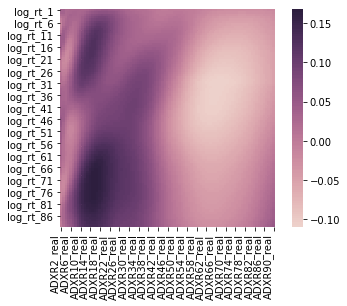

In [152]:
corr=corr_plot(responses,tech,TID_name)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


           avg_return  precision
boundary                        
-0.186582    0.084980   0.767045
-0.106291    0.099300   0.813253
-0.026000    0.114634   0.894040
 0.054291    0.162775   1.000000
 0.134583    0.281491   1.000000
 0.214874    0.335017   1.000000
 0.295165    0.428395   1.000000
 0.375456    0.468640   1.000000
 0.455747    0.511112   1.000000
 0.536038    0.538713   1.000000
           avg_return  precision
boundary                        
-0.092121   -0.032120   0.526316
-0.049371   -0.030826   0.534247
-0.006621   -0.023108   0.573770
 0.036129   -0.044114   0.450000
 0.078878   -0.041196   0.441176
 0.121628   -0.036651   0.458333
 0.164378   -0.039911   0.473684
 0.207128   -0.042949   0.428571
 0.249878   -0.033503   0.428571
 0.292628    0.035213   1.000000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


           avg_return  precision
boundary                        
-0.188398    0.070346   0.750000
-0.111224    0.086523   0.804511
-0.034050    0.102129   0.874317
 0.043125    0.140716   0.992509
 0.120299    0.222254   1.000000
 0.197473    0.308463   1.000000
 0.274647    0.407481   1.000000
 0.351821    0.451114   1.000000
 0.428995    0.515364   1.000000
 0.506169    0.520294   1.000000
           avg_return  precision
boundary                        
-0.087055    0.328953   0.947368
-0.020732    0.334796   0.933333
 0.045591    0.218082   0.840000
 0.111914    0.056246   0.714286
 0.178237    0.049395   0.700000
 0.244560   -0.018021   0.250000
 0.310883   -0.012745   0.000000
 0.377206   -0.012745   0.000000
 0.443530   -0.012745   0.000000
 0.509853   -0.012745   0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


           avg_return  precision
boundary                        
-0.203631    0.145745   0.776471
-0.080134    0.178014   0.864157
 0.043364    0.228989   0.987603
 0.166861    0.360911   0.995951
 0.290358    0.469644   1.000000
 0.413855    0.543887   1.000000
 0.537352    0.781436   1.000000
 0.660849    0.898034   1.000000
 0.784347    0.953842   1.000000
 0.907844    0.920105   1.000000
           avg_return  precision
boundary                        
-0.093226   -0.062541   0.328947
-0.010864   -0.063185   0.328767
 0.071497    0.032725   0.452830
 0.153859    0.213872   0.685714
 0.236221    0.175922   0.692308
 0.318583    0.186652   0.684211
 0.400945    0.512763   1.000000
 0.483307    0.522373   1.000000
 0.565669    0.637251   1.000000
 0.648031    0.906966   1.000000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


           avg_return  precision
boundary                        
-0.854211    0.091393   0.666309
-0.655683    0.092419   0.667025
-0.457155    0.098945   0.673536
-0.258627    0.110161   0.688470
-0.060099    0.166210   0.821809
 0.138429    0.331039   0.981928
 0.336957    0.536271   1.000000
 0.535486    0.834543   1.000000
 0.734014    0.887829   1.000000
 0.932542    0.920105   1.000000
           avg_return  precision
boundary                        
-0.290123   -0.030007   0.302632
-0.201174   -0.032281   0.295775
-0.112225   -0.033911   0.279412
-0.023276   -0.034815   0.283333
 0.065672   -0.037601   0.313725
 0.154621   -0.056895   0.193548
 0.243570   -0.089427   0.153846
 0.332519   -0.113473   0.000000
 0.421467   -0.158832   0.000000
 0.510416   -0.158832   0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


           avg_return  precision
boundary                        
-0.610816    0.064934   0.625000
-0.447153    0.076210   0.635739
-0.283490    0.090472   0.652557
-0.119826    0.125010   0.725838
 0.043837    0.224844   0.959872
 0.207500    0.395173   0.996047
 0.371164    0.554751   1.000000
 0.534827    0.807961   1.000000
 0.698490    0.937869   1.000000
 0.862154    0.976989   1.000000
           avg_return  precision
boundary                        
-0.514625    0.294784        1.0
-0.400604    0.290193        1.0
-0.286584    0.291432        1.0
-0.172563    0.280454        1.0
-0.058543    0.266775        1.0
 0.055478    0.270757        1.0
 0.169498    0.327636        1.0
 0.283519    0.405366        1.0
 0.397540    0.478012        1.0
 0.511560    0.478012        1.0


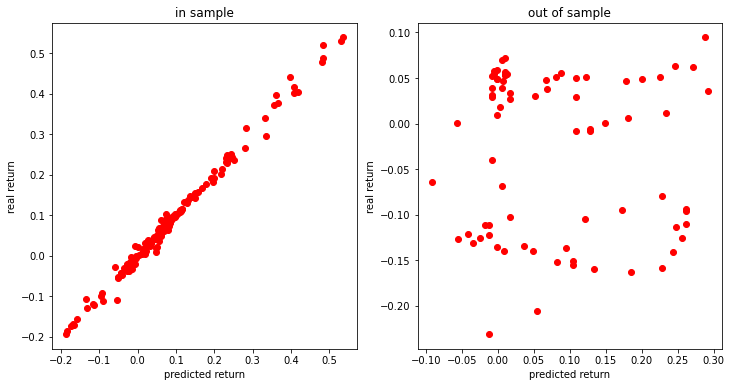

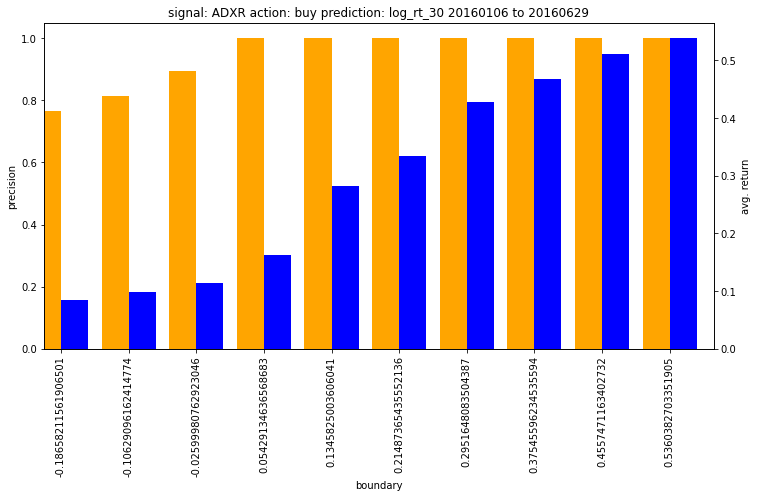

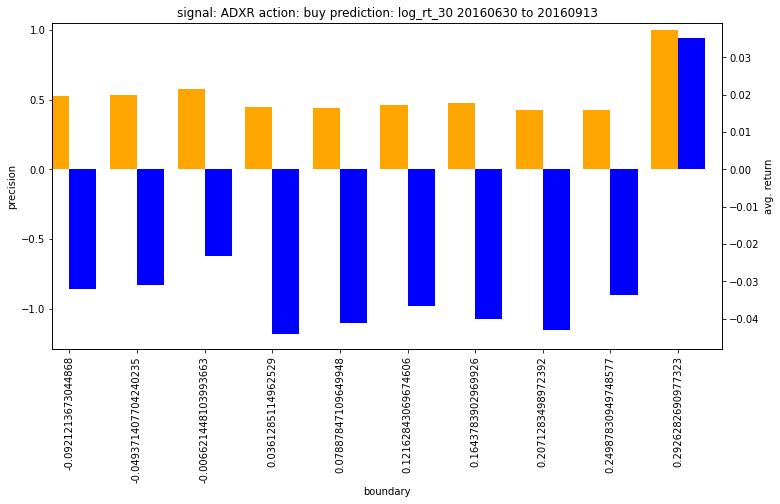

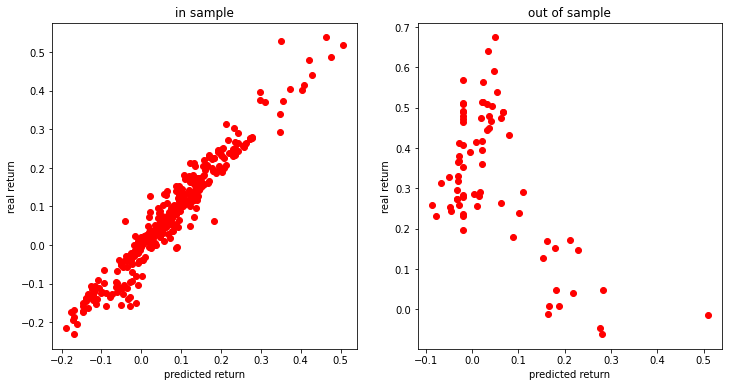

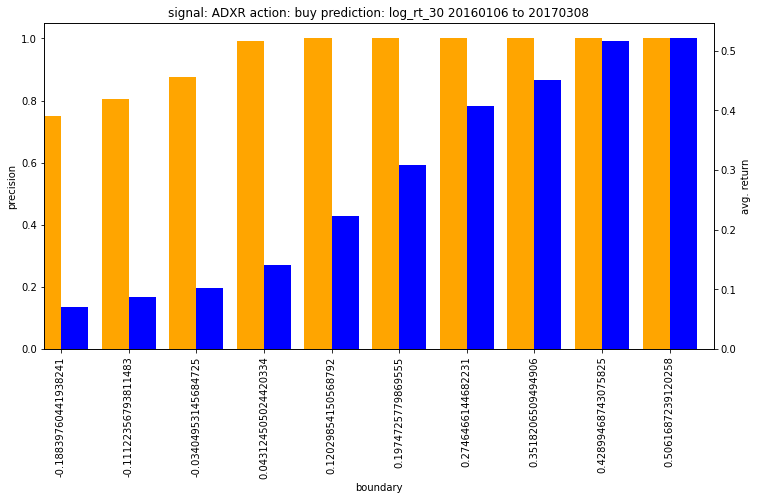

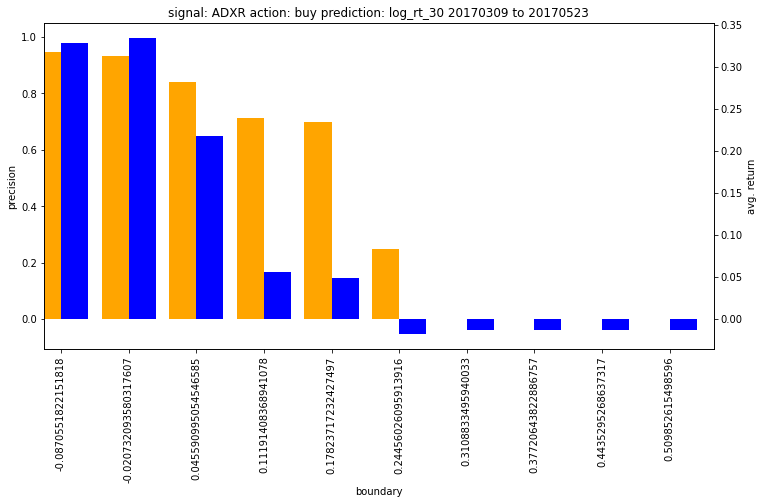

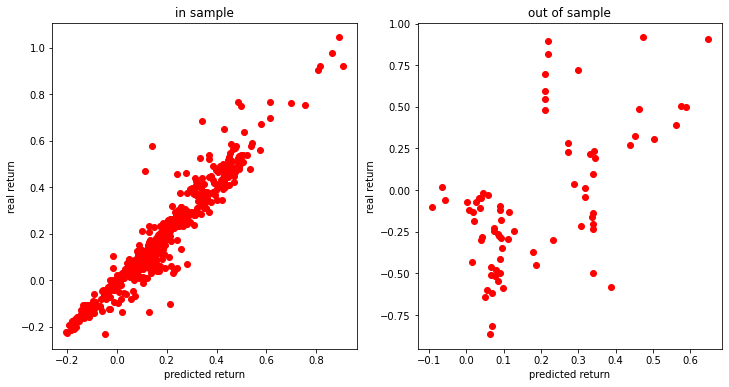

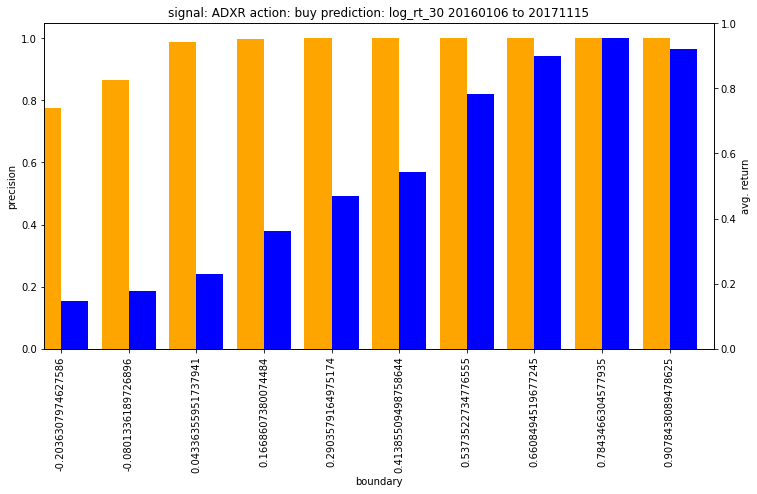

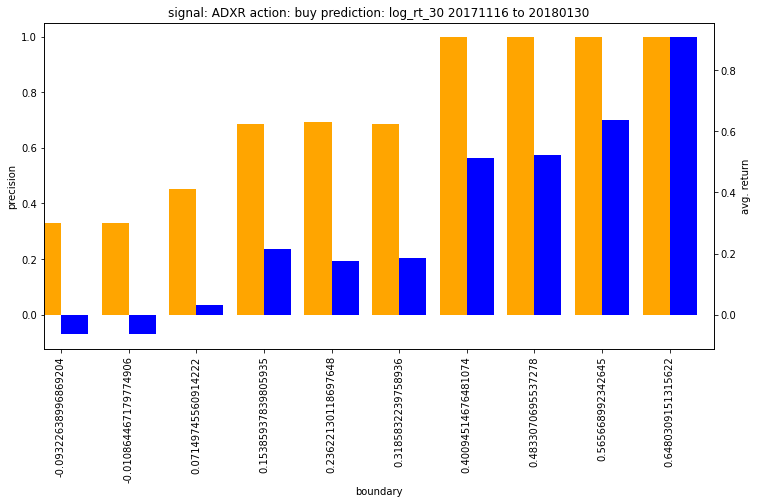

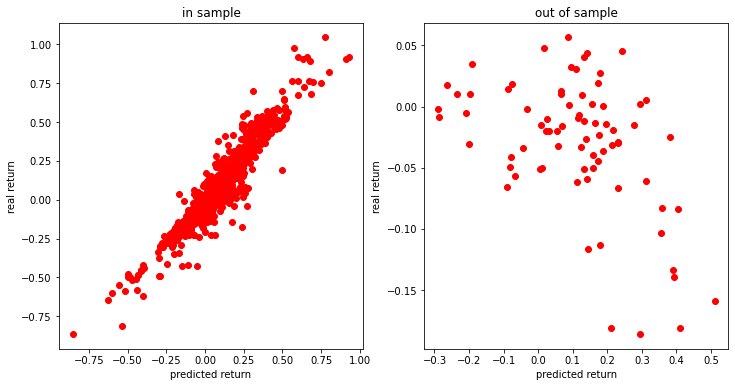

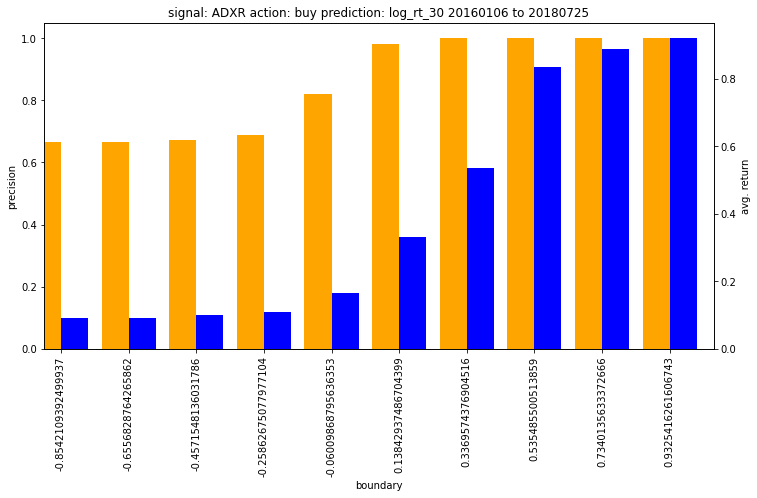

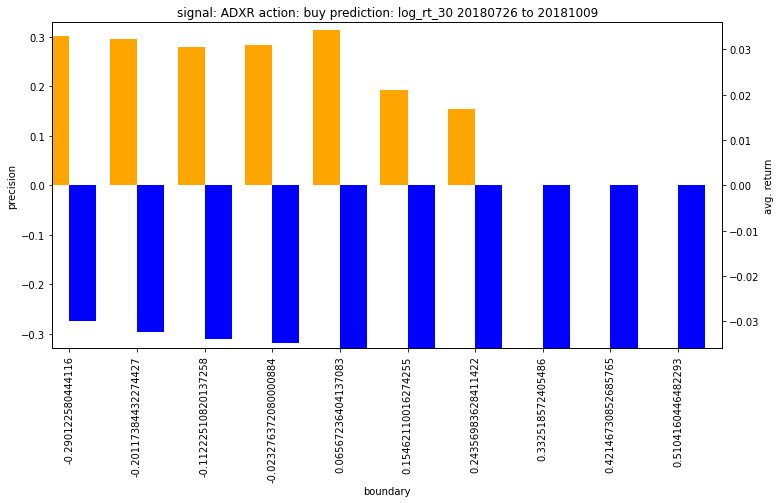

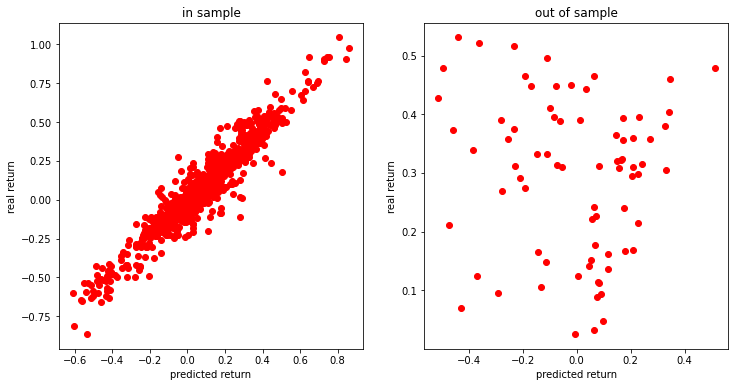

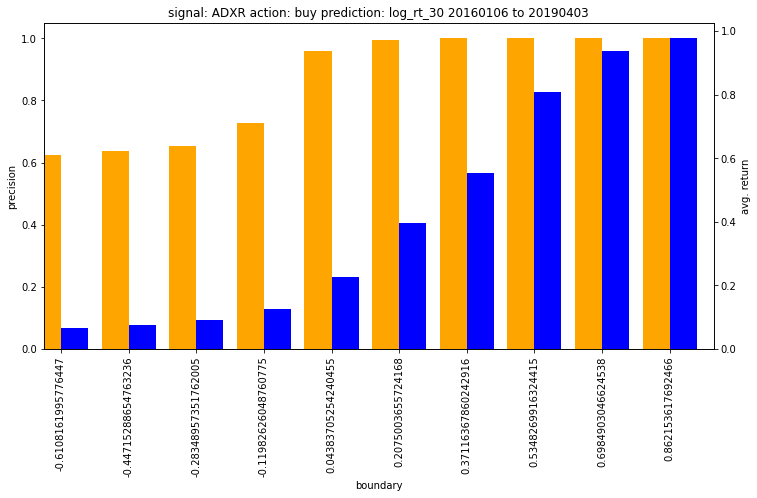

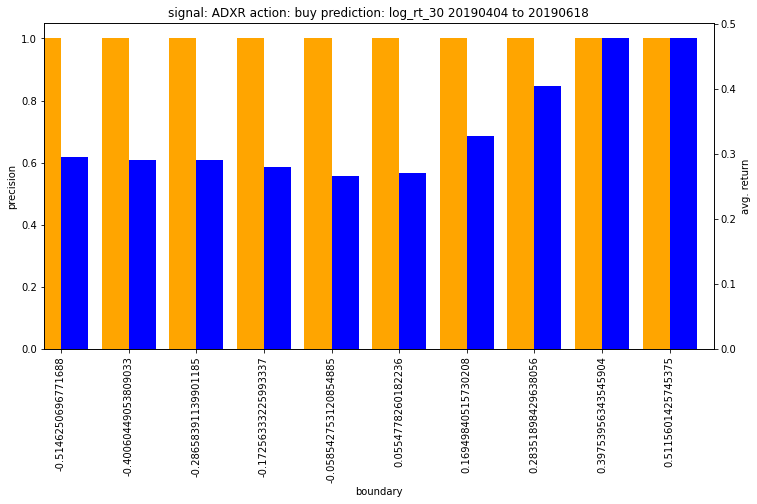

In [153]:
target='log_rt_30'
Y=responses.loc[start:end,[target]]

fit_techs(X,Y,TID_name,target,10)

In [ ]:
def to2Dlist(ls):
    return [[x] for x in ls]
def corr_plot(responses,tech,tech_name):
    mergedDf = tech.merge(responses, left_index=True, right_index=True)
    mergedDf.dropna(inplace=True)
    corr = mergedDf.corr()
    sub_corr=corr.iloc[tech.shape[1]:, 0:tech.shape[1]]
    min_=sub_corr.min().min()
    max_=sub_corr.max().max()
    if max_>0:
        cmap_=sns.cubehelix_palette(100)
    else:
        cmap_=sns.color_palette("BuGn_r",100)
    ax = sns.heatmap(
        sub_corr, 
        vmin=min_, vmax=max_, center=(min_+max_)/2,
        cmap=cmap_,
        square=True
    )
        
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    )
    ax.figure.savefig('./figures/corr_'+tech_name+'.png')
    return sub_corr

In [129]:
#plot p values
def feature_selection(X,Y,num_features=5):
    selector = SelectKBest(f_regression, k=num_features)
    selector.fit(X, Y)
    scores = -np.log10(selector.pvalues_)
    plt.plot(scores)
    return selector.get_support(indices=True)

def fit_techs(X,Y,tech_name,target,num=5):
    #tech_name:'RSI'
    #target:'log_rt_15'
    model = make_pipeline(
            SelectKBest(f_regression, k=num), MinMaxScaler(), RandomForestRegressor()
    )
    tt=get_split_index(X.shape[0],5)
    for x in tt:
        test_on_window(X,Y,x,tech_name,target,model)

In [9]:
def get_split_index(length,n_splits,samplesize=0.7):
    block_size=length//n_splits
    result=[]
    for i in range(n_splits):
        start = 0
        stop = i * block_size + block_size
        mid = int(samplesize*block_size) + i * block_size
        result.append((start,mid,stop))
    return result 
def get_split_index_shift(length,n_splits,samplesize=0.7):
    block_size=length//n_splits
    result=[]
    for i in range(n_splits):
        start = i * block_size
        stop = start + block_size
        mid = int(samplesize*(stop-start)) + start
        result.append((start,mid,stop))
    return result  

In [109]:
def test_on_window(X,Y,indices,strg_name,target,clf_selected):
    #strg_name='RSI'
    #target='log_rt_15'
    start,mid,stop=indices
    X_train = X.iloc[start:mid, :]
    Y_train = Y.iloc[start:mid, :]

    X_test = X.iloc[mid:stop, :]
    Y_test = Y.iloc[mid:stop, :]

    clf_selected.fit(X_train,Y_train)  
    Y_pred=clf_selected.predict(X_test)

    fig_width = 12
    fig_height = 6
    fig = plt.figure(figsize=(fig_width,fig_height))
    layout = (1, 2)
    is_ax = plt.subplot2grid(layout, (0, 0))
    os_ax = plt.subplot2grid(layout, (0, 1))
    is_ax.scatter(clf_selected.predict(X_train),Y_train,c='r')
    os_ax.scatter(clf_selected.predict(X_test),Y_test,c='r')

    is_ax.set_title('in sample')
    os_ax.set_title('out of sample')

    is_ax.set_ylabel('real return')
    is_ax.set_xlabel('predicted return')
    os_ax.set_ylabel('real return')
    os_ax.set_xlabel('predicted return')

    filename='_'.join([strg_name,target,clf_selected.steps[2][0],X.index[start].strftime("%Y%m%d"),X.index[stop].strftime("%Y%m%d")])
    fig.savefig('./results/'+filename+'.png')

    #import strategy_test as st
    #in sample performance
    pred=pd.DataFrame({strg_name: clf_selected.predict(X_train)})
    pred.index=Y_train.index
    start=Y_train.index[0]
    end=Y_train.index[-1]
    rules={'action':'buy','y':target,'signal':strg_name}
    test=strategy_test(rules,pred,Y_train)
    test.model_testing(start,end)

    #out of sample performance
    pred=pd.DataFrame({strg_name: clf_selected.predict(X_test)})
    pred.index=Y_test.index
    start=Y_test.index[0]
    end=Y_test.index[-1]
    test=strategy_test(rules,pred,Y_test)
    test.model_testing(start,end)

In [52]:
from collections import  OrderedDict
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

class strategy_test(object):
    def __init__(self,rules,regressor,targets):
        """
        Set up a strategy env, feed in the data and initial status of the ledger

        :param env: market env collection
        :param initial: initial ledger status
        :param rules: controls over the strategy
        """
        self.regressor = regressor
        self.targets=targets
        self.rules = rules
    def stats_calc(self,tt,action=1):
        if action==-1:
            return OrderedDict([('sum', -1*tt.sum() if abs(tt.sum())>0 else 0), ('count',tt.count() if tt.count()>0 else 0), ('average', -1*tt.sum()/tt.count() if tt.count()>0 else 0)])    
        else:
            return OrderedDict([('sum', tt.sum() if abs(tt.sum())>0 else 0), ('count',tt.count() if tt.count()>0 else 0), ('average', tt.sum()/tt.count() if tt.count()>0 else 0)])
    
    def signal_stats(self,result,signal,pred,bd):
        stats=dict()
        if self.rules['action']=='buy':
            stats['FP']=self.stats_calc(result.loc[(result[signal]>=bd) & (result[pred] <0)][pred])
            stats['TP']=self.stats_calc(result.loc[(result[signal]>=bd) & (result[pred] >=0)][pred])
        else:
            stats['FP']=self.stats_calc(result.loc[(result[signal]<=bd) & (result[pred] >0)][pred],-1)
            stats['TP']=self.stats_calc(result.loc[(result[signal]<=bd) & (result[pred] <=0)][pred],-1)
        return stats
    def calc_avg_return(self,x):
        temp=(x[1]['FP']['sum']+x[1]['TP']['sum'])/(x[1]['FP']['count']+x[1]['TP']['count']) if (x[1]['FP']['count']+x[1]['TP']['count'])>0 else 0 
        if temp!=None:
            return temp
        else:
            return 0
    def calc_precision(self,x):
        temp=x[1]['TP']['count']/(x[1]['FP']['count']+x[1]['TP']['count']) if (x[1]['FP']['count']+x[1]['TP']['count'])>0 else 0
        if temp!=None:
            return temp
        else:
            return 0
    def model_testing(self, start, end):
        signal=self.rules['signal']
        pred=self.rules['y']
        result = pd.concat([self.regressor.loc[start:end,[signal]], self.targets.loc[start:end,[pred]]], axis=1, join='inner')
        result=result.dropna()
        l=result[signal].min()
        h=result[signal].max()
        if h-l<.0001:
            hypers=[l-0.1,(l+h)/2,h+0.1]
        else:
            hypers=[x for x in np.linspace(l,h,10)]
        temp=[]
        for x in hypers:
            bd=x
            temp.append((x,self.signal_stats(result,signal,pred,bd)))
        summary= pd.DataFrame({"boundary":hypers, 
                       "avg_return":[self.calc_avg_return(x) for x in temp],
                      "precision":[self.calc_precision(x) for x in temp]})
        summary.set_index('boundary',inplace=True)
        summary.dropna(inplace=True)
        fig_width = 12
        fig_height = 6
        fig, ax = plt.subplots(figsize=(fig_width,fig_height))
        ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

        width = 0.4
        print(summary)
        summary['precision'].plot(kind='bar', color='orange', ax=ax, width=width, position=1)
        summary['avg_return'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
        ax.set_title(' '.join(['signal:',signal,'action:',self.rules['action'],'prediction:',pred,start.strftime("%Y%m%d"),'to',end.strftime("%Y%m%d")]))
        ax.set_ylabel('precision')
        ax2.set_ylabel('avg. return')
        l=summary['avg_return'].min()
        h=summary['avg_return'].max()
        buffer=0.05*(h-l)
        if l*h<0:
            y1=abs(l-buffer)/(h+buffer)*1.05
            ax.set_ylim([-y1, 1.05])
            ax2.set_ylim([l-buffer,h+buffer])
        elif h<0: 
            h1=1.05*summary['precision'].max()
            h2=h*1.2
            ax2.set_ylim([h2,-h2])
            ax.set_ylim([-h1, h1])
        filename='_'.join([self.rules['action'],signal,pred,start.strftime("%Y%m%d"),end.strftime("%Y%m%d")])
        fig.savefig('./test/'+filename+'.png')
        summary.to_csv ('./results/'+filename+'.csv')
    def signal_testing(self, start, end):
        signal=self.rules['signal']
        pred=self.rules['y']
        result = pd.concat([self.regressor.loc[start:end,[signal]], self.targets.loc[start:end,[pred]]], axis=1, join='inner')
        result=result.dropna()
        l=int(result[signal].min())-1
        h=int(result[signal].max())+1
        hypers=[int(x) for x in np.linspace(l,h,20)]
        temp=[]
        for x in hypers:
            bd=x
            temp.append((int(x),self.signal_stats(result,signal,pred,bd)))
        summary= pd.DataFrame({"boundary":hypers, 
                       "avg_return":[(x[1]['FP']['sum']+x[1]['TP']['sum'])/(x[1]['FP']['count']+x[1]['TP']['count']) for x in temp],
                      "precision":[x[1]['TP']['count']/(x[1]['FP']['count']+x[1]['TP']['count']) for x in temp]})
        summary.set_index('boundary',inplace=True)
        summary.dropna(inplace=True)
        fig_width = 12
        fig_height = 6
        fig, ax = plt.subplots(figsize=(fig_width,fig_height))
        ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

        width = 0.4

        summary['precision'].plot(kind='bar', color='m', ax=ax, width=width, position=1)
        summary['avg_return'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
        ax.set_title(' '.join(['signal:',signal,'action:',self.rules['action'],'prediction:',pred,start.strftime("%Y%m%d"),'to',end.strftime("%Y%m%d")]))
        ax.set_ylabel('precision')
        ax2.set_ylabel('avg. return')
        l=summary['avg_return'].min()
        h=summary['avg_return'].max()
        buffer=0.05*(h-l)
        if l*h<0:
            y1=abs(l-buffer)/(h+buffer)*1.05
            ax.set_ylim([-h1, h1])
            ax2.set_ylim([l-buffer,h+buffer])
        elif h<0: 
            h1=1.05*summary['precision'].max()
            h2=h*1.2
            ax2.set_ylim([h2,-h2])
            ax.set_ylim([-h1, h1])   
        filename='_'.join([self.rules['action'],signal,pred,start.strftime("%Y%m%d"),end.strftime("%Y%m%d")])
        fig.savefig('./test/'+filename+'.png')         

In [44]:
summary= pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

In [45]:
summary

,a,b
0,1,4
1,2,5
2,3,6


In [48]:
tt=summary[summary['b']>6]

In [51]:
tt['a'].count()

0